# Прогнозирование временного ряда с помощью FEDOT

## Временной ряд 1

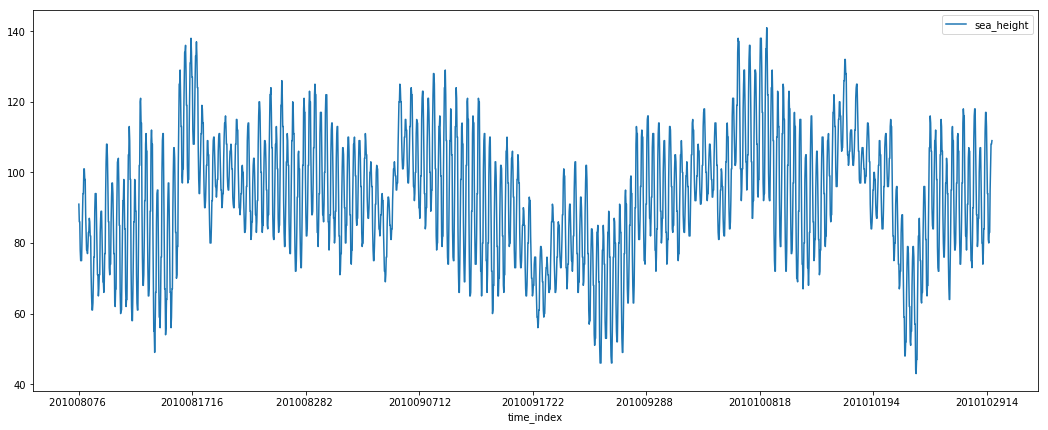

Length of the time series - 2012


In [18]:
# Additional imports 
import pandas as pd 
import numpy as np

# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Import data
df = pd.read_csv('metocean.csv', parse_dates=['time_index'])

# Plot data
df.plot('time_index', 'sea_height')
plt.show()

print(f'Length of the time series - {len(df)}')

# numpy array with time series
traffic = np.array(df['sea_height'])

In [56]:
def display_results(actual_time_series, predicted_values, len_train_data, y_name = 'Sea height'):
    """
    Function for drawing plot with predictions and check metrics
    
    :param actual_time_series: the entire array with one-dimensional data
    :param predicted_values: array with predicted values
    :param len_train_data: number of elements in the training sample
    :param y_name: name of the y axis
    """
    
    plt.plot(np.arange(0, len(actual_time_series)), 
             actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
    # Plot black line which divide our array into train and test
    plt.plot([len_train_data, len_train_data],
             [min(actual_time_series), max(actual_time_series)], c = 'black', linewidth = 1)
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.xlim(len_train_data-150, len(actual_time_series)+10)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()
    
    mae_value = mean_absolute_error(actual_time_series[len_train_data:], predicted_values)
    print(f'MAE value: {mae_value}')

In [39]:
# fedot api
from fedot.api.main import Fedot

# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

# Input data for fit and predict
from fedot.core.data.data import InputData

# Train and test split 
from fedot.core.data.data_split import train_test_data_setup

# Data types in FEDOT
from fedot.core.repository.dataset_types import DataTypesEnum

In [40]:
# forecast horizon for model
forecast_length = 72
task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=forecast_length))

# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'metocean.csv', target_column='sea_height')

# Divide into train and test 
train_data, test_data = train_test_data_setup(input_data)

In [49]:
# Init model for the time series forecasting
params = {'max_depth': 10,'max_arity': 3, 'pop_size': 10,
          'num_of_generations': 30, 'learning_time': 3, 'preset': 'light_tun'}

model = Fedot(problem='ts_forecasting', task_params=task.task_params,
              composer_params=params)

# Run AutoML model design in the same way
chain = model.fit(features=train_data)

# Use model to obtain forecast
forecast = model.predict(features=test_data)

Composition started. Parameters tuning: True. Set of candidate models: ['linear', 'lasso', 'ridge', 'xgbreg', 'adareg', 'gbr', 'dtreg', 'treg', 'rfr', 'svr', 'sgdr', 'ar', 'scaling', 'normalization', 'simple_imputation', 'pca', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfe_lin_reg', 'rfe_non_lin_reg', 'lagged', 'smoothing', 'gaussian_filter']. Composing time limit: 3 min
Model composition started
Hyperparameters tuning started
Default loss function was set
Hyperparameters optimization start
 14%|██████▍                                      | 144/1000 [01:31<09:02,  1.58trial/s, best loss: 2.8570706135992276]
Hyperparameters optimization finished
Return tuned chain due to the fact that obtained metric 2.857 equal or smaller than initial (+ 5% deviation) 10.285
Model composition finished


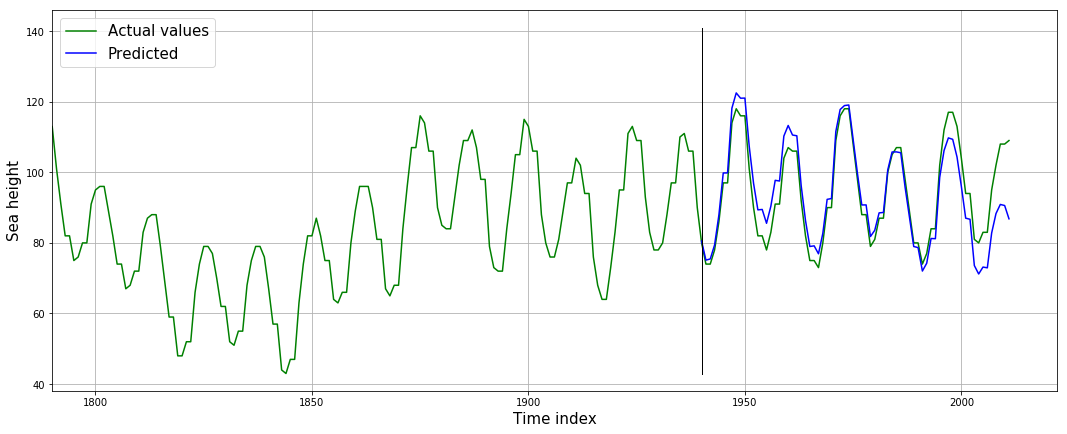

MAE value: 4.9226347340342995


In [46]:
display_results(traffic, forecast, len(train_data.features))

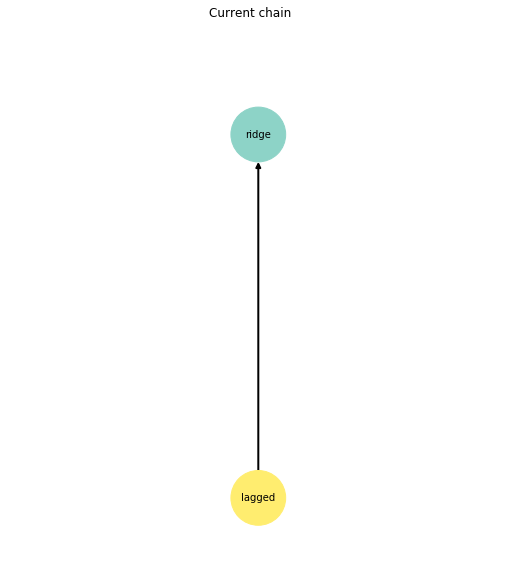

Obtained chain:
ridge, params: {'alpha': 9.283352713220891}
lagged, params: {'window_size': 232.88265926941313}


In [47]:
chain.show()

print('Obtained chain:')
for node in chain.nodes:
    print(f'{node.operation}, params: {node.custom_params}')

## Временной ряд 2

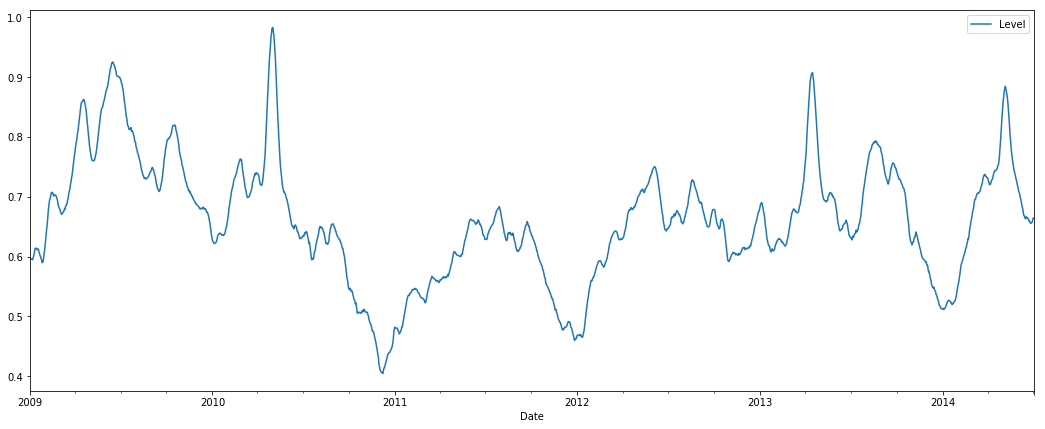

Length of the time series - 2011


In [62]:
# Import data
df = pd.read_csv('ts_sea_level.csv', parse_dates=['Date'])

# Plot data
df.plot('Date', 'Level')
plt.show()

print(f'Length of the time series - {len(df)}')

# numpy array with time series
traffic = np.array(df['Level'])

In [63]:
# forecast horizon for model
forecast_length = 72
task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=forecast_length))

# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'ts_sea_level.csv', target_column='Level')

# Divide into train and test 
train_data, test_data = train_test_data_setup(input_data)

# Init model for the time series forecasting
params = {'max_depth': 10,'max_arity': 3, 'pop_size': 10,
          'num_of_generations': 30, 'learning_time': 3, 'preset': 'light_tun'}

model = Fedot(problem='ts_forecasting', task_params=task.task_params,
              composer_params=params)

# Run AutoML model design in the same way
chain = model.fit(features=train_data)

# Use model to obtain forecast
forecast = model.predict(features=test_data)

Composition started. Parameters tuning: True. Set of candidate models: ['linear', 'lasso', 'ridge', 'xgbreg', 'adareg', 'gbr', 'dtreg', 'treg', 'rfr', 'svr', 'sgdr', 'ar', 'scaling', 'normalization', 'simple_imputation', 'pca', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfe_lin_reg', 'rfe_non_lin_reg', 'lagged', 'smoothing', 'gaussian_filter']. Composing time limit: 3 min
Model composition started


C:\Users\user\anaconda3\envs\new_fedot\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Hyperparameters tuning started
Default loss function was set
Hyperparameters optimization start
  0%|▏                                           | 4/1000 [02:04<8:37:25, 31.17s/trial, best loss: 0.12031388126412813]
Hyperparameters optimization finished
Return init chain due to the fact that obtained metric 0.120 bigger than initial (+ 5% deviation) 0.073
Model composition finished


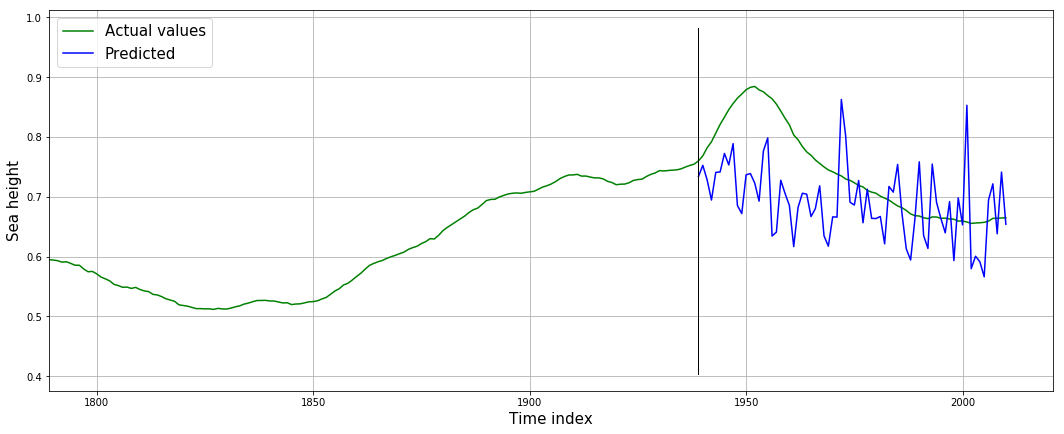

MAE value: 0.07734702674018015


In [64]:
# Use model to obtain forecast
forecast = model.predict(features=test_data)

display_results(traffic, forecast, len(train_data.features))

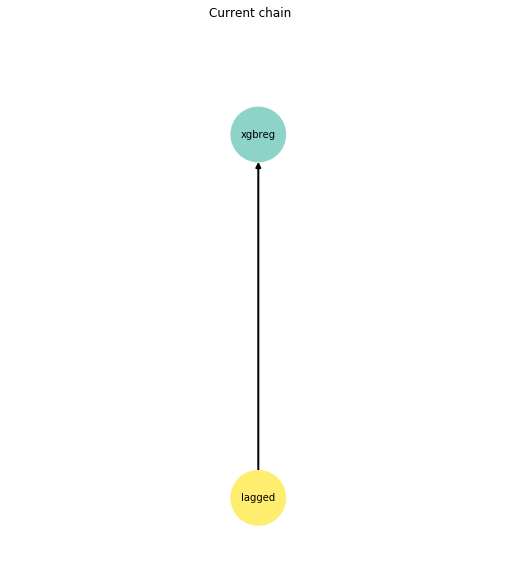

Obtained chain:
xgbreg, params: {'learning_rate': 1.0, 'max_depth': 3, 'min_child_weight': 19, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.6000000000000001}
lagged, params: {'window_size': 299.11196805559797}


In [65]:
chain.show()

print('Obtained chain:')
for node in chain.nodes:
    print(f'{node.operation}, params: {node.custom_params}')